
- `Author: SAGAR Hedi`
- `Project: Option Pricing Analysis - Black-Scholes Model and Monte Carlo Simulations`

# Black-Scholes Model: A Revolution in Financial Engineering - Hedi SAGAR

The Black-Scholes model, introduced in 1973 by economists Fischer Black and Myron Scholes, marked a significant milestone in modern financial theory. It provided the first widely adopted mathematical framework for pricing options, a type of financial derivative. Later, Robert Merton expanded the model's capabilities, leading to what is now known as the Black-Scholes-Merton model. These developments earned Scholes and Merton the 1997 Nobel Prize in Economics.

## The Black-Scholes Formula
The Black-Scholes formula is a cornerstone in the field of financial options pricing. It offers a theoretical estimate for the price of European-style options. The formula is expressed as:

\begin{equation*}
C(S, t) = N(d_1)S - N(d_2)PV(K)
\end{equation*}

Where:
- `C(S, t)` represents the price of the call option.
- `S` is the current price of the underlying asset.
- `t` denotes the time until the expiration of the option.
- `N(d)` is the cumulative distribution function of the standard normal distribution.
- `d_1` and `d_2`, critical components of the model, are calculated as follows:

\begin{equation*}
d_1 = \frac{\ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)t}{\sigma\sqrt{t}}
\end{equation*}

\begin{equation*}
d_2 = d_1 - \sigma\sqrt{t}
\end{equation*}

- `K` is the strike price of the option.
- `r` signifies the risk-free interest rate.
- `σ` (sigma) represents the volatility of the underlying asset.
- `PV(K)` is the present value of the strike price, computed as $ K e^{-rt} $.

## Project Objectives and Overview
This project encompasses two main objectives: 
1. **Application of the Black-Scholes Model:** To demonstrate the practical use of the Black-Scholes formula in calculating the price of European call options, using real-world data for underlying asset price, strike price, risk-free rate, and volatility.
2. **Exploration of Monte Carlo Simulations:** To extend the application of the Black-Scholes model by incorporating Monte Carlo simulations, this part of the project illustrates the dynamic nature of option pricing under varying market conditions, including changes in the volatility and time to expiration of the option.

In [123]:
# Importing Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

## Estimating the Price of a European Call Option Using the Black-Scholes Model

### Project Background

In this insightful project, I embarked on calculating the price of a European call option through the lens of the Black-Scholes model. My prime objective was to delve deep into the intricate ways various financial variables shape options pricing.

### Option Parameters

- **Current Price of the Underlying Asset:** $50 USD, an example being the market price of a specific stock.
- **Strike Price of the Option:** $52 USD.
- **Validity Period:** A span of 6 months, equating to 0.5 years.
- **Risk-Free Interest Rate:** An annual figure of 2%.
- **Asset Volatility:** Set at an annual rate of 30%.

### Methodology

1. **Calculation of `d_1` and `d_2`:** My journey began with the calculation of `d_1` and `d_2`, grounding my approach in the standardized mathematical formulas intrinsic to the Black-Scholes model.
2. **Estimation of Option Pricing:** Subsequently, I integrated these calculated values into the Black-Scholes formula, paving the way to ascertain the call option's price.
3. **Sensitivity Analysis:** Further, I probed into the effects of varying volatility levels (20%, 30%, and 40%) on the option’s pricing. This exploration was pivotal in enhancing my understanding of the option's price sensitivity to the ebbs and flows of market volatility.

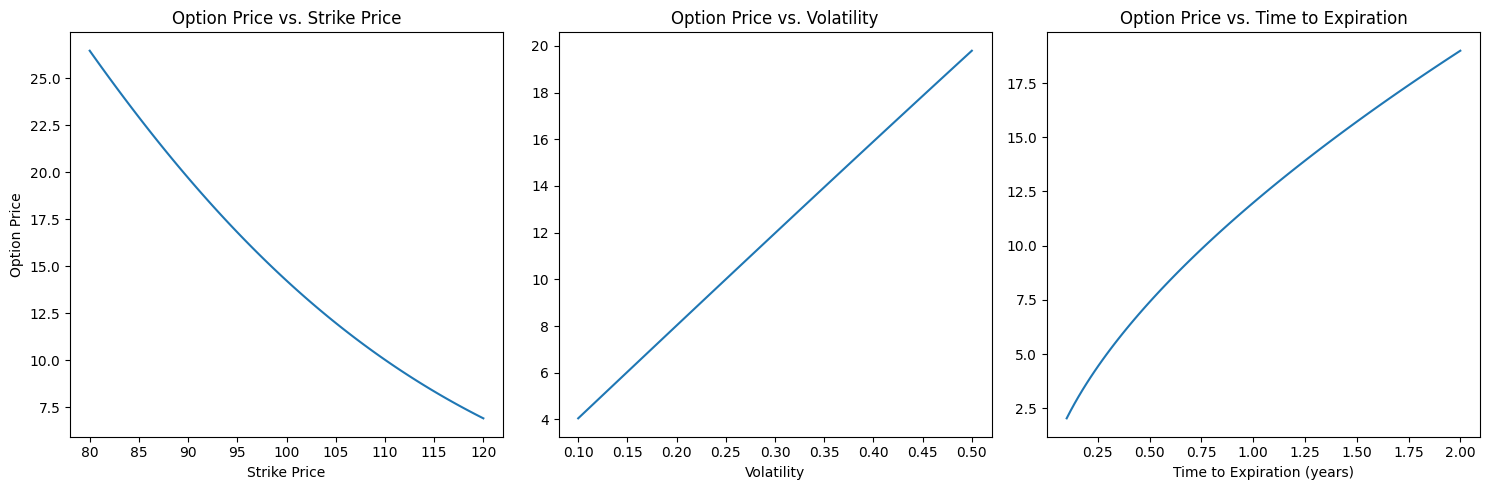

In [122]:
def d_1(S, K, r, σ, t):
    return (np.log(S / K) + (r + (σ**2) / 2) * t) / (σ * np.sqrt(t))

def d_2(S, K, r, σ, t):
    return d_1(S, K, r, σ, t) - σ * np.sqrt(t)

def PV(K, r, t):
    return K * np.exp(-r * t)

def N(d):
    return norm.cdf(d)

def option_price(S, K, r, σ, t):
    d1 = d_1(S, K, r, σ, t)
    d2 = d_2(S, K, r, σ, t)
    return N(d1) * S - N(d2) * PV(K, r, t)

# Input data for subplots
S0 = 100  # Current price of the underlying asset
K_range = np.linspace(80, 120, 100)  # Range of strike prices
σ_range = np.linspace(0.1, 0.5, 100)  # Range of volatilities
t_range = np.linspace(0.1, 2, 100)  # Range of time to expirations

# Initialize subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Option price vs. Strike price
C_S_K = [option_price(S0, K, 0.05, 0.30, 1) for K in K_range]
axs[0].plot(K_range, C_S_K)
axs[0].set_title('Option Price vs. Strike Price')
axs[0].set_xlabel('Strike Price')
axs[0].set_ylabel('Option Price')

# Plot 2: Option price vs. Volatility
C_S_σ = [option_price(S0, 105, 0.05, σ, 1) for σ in σ_range]
axs[1].plot(σ_range, C_S_σ)
axs[1].set_title('Option Price vs. Volatility')
axs[1].set_xlabel('Volatility')

# Plot 3: Option price vs. Time to Expiration
C_S_t = [option_price(S0, 105, 0.05, 0.30, t) for t in t_range]
axs[2].plot(t_range, C_S_t)
axs[2].set_title('Option Price vs. Time to Expiration')
axs[2].set_xlabel('Time to Expiration (years)')

plt.tight_layout()
plt.show()

## Project: Estimating the Price of an Option Using Monte Carlo Simulation within the Black-Scholes Framework

### Project Overview
In this project, I developed a model to estimate the price of a European call option utilizing the Monte Carlo method, integrated within the Black-Scholes framework. This endeavor was aimed at harnessing the power of statistical techniques to predict financial outcomes under uncertainty.

### Project Data
- **Current Price of the Underlying Asset:** $100 USD.
- **Strike Price of the Option:** $105 USD.
- **Option Validity Duration:** 1 year.
- **Annual Risk-Free Interest Rate:** 5%.
- **Annual Volatility of the Underlying Asset:** 20%.

### Tasks and Methodology
1. **Simulation of Asset Price Paths:** I initiated the project by simulating multiple paths for the underlying asset’s price using the geometric Brownian motion models.
2. **Payoff Calculation:** At the end of each simulated path, I calculated the option's payoff.
3. **Option Pricing Estimation:** I then estimated the option's price by computing and discounting the average of these payoffs at the risk-free interest rate.

### Insights and Techniques
- I conducted a large number of simulations (over 10,000) to ensure precision and robustness in my model.
- The geometric Brownian motion model for the underlying asset price, $S_t$, at time $t$ was formulated as:

    \begin{equation*}
    S_t = S_0 \exp\left(\left(r - \frac{1}{2} \sigma^2\right)t + \sigma \sqrt{t} Z\right)
    \end{equation*}

    where $Z$ is a random variable from a standard normal distribution.
- The payoff for a call option was calculated using $\max(S_t - K, 0)$, where $S_t$ is the asset price at expiration, and $K$ is the strike price.
- For discounting the payoffs to present value, I used:

    \begin{equation*}
    V = \frac{P}{(1 + r)^T}
    \end{equation*}

    where $V$ represents the present value, $P$ the future payoff or cash flow, $r$ the annual risk-free interest rate, and $T$ the number of years until the payoff realization.

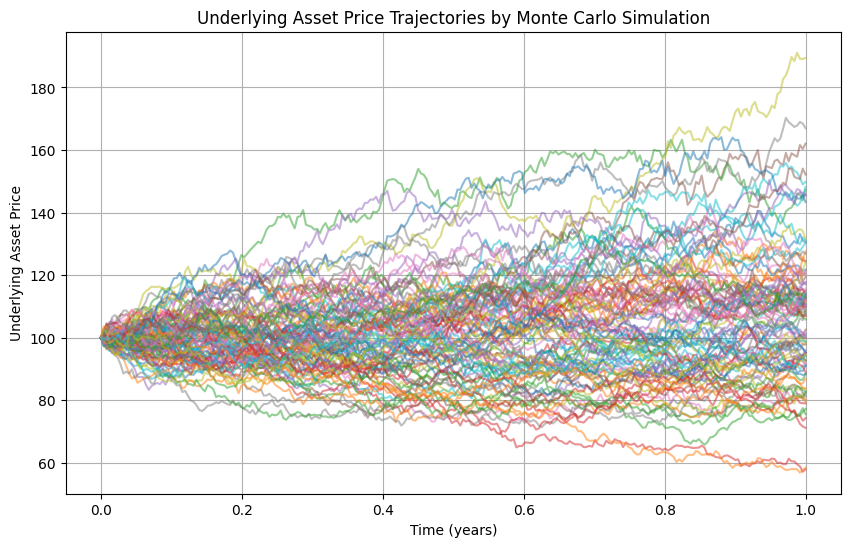

Estimated Option Price: 9.42


In [119]:
def brownian_movement(r, σ, T, S0, num_steps):
    """
    Simulates the geometric Brownian motion of an asset price over time.

    Parameters:
    r (float): Risk-free interest rate.
    σ (float): Volatility of the asset.
    T (float): Total time to maturity.
    S0 (float): Initial price of the underlying asset.
    num_steps (int): Number of time steps for the simulation.

    Returns:
    numpy.ndarray: Simulated asset price at each time step.
    """
    dt = T / num_steps
    S_t = np.zeros(num_steps)
    S_t[0] = S0

    for step in range(1, num_steps):
        Z = np.random.normal(0, 1)
        S_t[step] = S_t[step - 1] * np.exp((r - (σ**2) / 2) * dt + σ * np.sqrt(dt) * Z)

    return S_t

def simulate_option_price(r, σ, T, S0, K, num_simulations, num_steps):
    """
    Estimates the price of a European call option using Monte Carlo simulation.

    Parameters:
    r (float): Risk-free interest rate.
    σ (float): Volatility of the asset.
    T (float): Total time to maturity.
    S0 (float): Initial price of the underlying asset.
    K (float): Strike price of the option.
    num_simulations (int): Number of simulated asset paths.
    num_steps (int): Number of time steps for each simulation.

    Returns:
    float: Estimated price of the option.
    """
    payoffs = np.zeros(num_simulations)
    times = np.linspace(0, T, num_steps)
    
    plt.figure(figsize=(10, 6)) 

    for sim in range(num_simulations):
        S = brownian_movement(r, σ, T, S0, num_steps)
        payoffs[sim] = np.maximum(S[-1] - K, 0)
        plt.plot(times, S, alpha=0.5)

    plt.xlabel("Time (years)")
    plt.ylabel("Underlying Asset Price")
    plt.title("Underlying Asset Price Trajectories by Monte Carlo Simulation")
    plt.grid(True)
    plt.show()

    payoff_mean = np.mean(payoffs)
    return payoff_mean * np.exp(-r * T)

# Data
np.random.seed(1)
S0 = 100
K = 105
T = 1
r = 0.05
σ = 0.20
num_simulations = 100
num_steps = 252  # Number of business days in a year

# Option price estimation
option_price = simulate_option_price(r, σ, T, S0, K, num_simulations, num_steps)
print(f"Estimated Option Price: {option_price:.2f}")